In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Загрузим данные в DataFrame и выведем первые 5 строк на экран:

In [105]:
data = pd.read_excel('Analytic_test.xlsx',skiprows=1, usecols=lambda x: 'Unnamed' not in x)

In [106]:
data.head()

,HID,active_Red,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gvm_total,Green_gvm_order_count,Black_gvm_total,...,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
0,00003c7fb5e57ce673f1801f3679f5c25,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00006b602533083e3bebfcbff08613931,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0000736c3f76339196cb1cc759b8363b,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00009bdcc5307b38efde8690b8bd658e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0000bc3186b7b31d9b35d3fbbb250b9f8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Посмотрим информацию о датафрейме:

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   HID                    100000 non-null  object 
 1   active_Red             100000 non-null  float64
 2   has_Green_id           100000 non-null  float64
 3   has_Black_id           100000 non-null  float64
 4   has_Blue_id            100000 non-null  float64
 5   Blue_activity_count    100000 non-null  object 
 6   Blue_gmv_total         99999 non-null   float64
 7   Green_gvm_total        100000 non-null  float64
 8   Green_gvm_order_count  100000 non-null  object 
 9   Black_gvm_total        100000 non-null  float64
 10  Black_gvm_order_count  100000 non-null  object 
 11  Red_android            100000 non-null  float64
 12  Green_android          100000 non-null  float64
 13  Black_android          100000 non-null  float64
 14  Blue_android           100000 non-nul

Видим, что в столбце Blue_gmv_total содержится nan значение. Также, у столбцов Blue_activity_count, Green_gvm_order_count и Black_gvm_order_count тип данных 'object'. Во избежание возможных ошибок, изменим у этих столбцов тип данных на 'float64', удалим недопустимые значения (например, в столбце Blue_activity_count на позиции 5745 стоит дата вместо числа), и заменим nan значения на 0:

In [108]:
data['Blue_activity_count'] = pd.to_numeric(data['Blue_activity_count'], errors='coerce')
data['Green_gvm_order_count'] = pd.to_numeric(data['Green_gvm_order_count'], errors='coerce')
data['Black_gvm_order_count'] = pd.to_numeric(data['Black_gvm_order_count'], errors='coerce')
data[['Blue_gmv_total', 'Blue_activity_count', 'Green_gvm_order_count', 'Black_gvm_order_count']] = data[['Blue_gmv_total', 'Blue_activity_count', 'Green_gvm_order_count', 'Black_gvm_order_count']].fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   HID                    100000 non-null  object 
 1   active_Red             100000 non-null  float64
 2   has_Green_id           100000 non-null  float64
 3   has_Black_id           100000 non-null  float64
 4   has_Blue_id            100000 non-null  float64
 5   Blue_activity_count    100000 non-null  float64
 6   Blue_gmv_total         100000 non-null  float64
 7   Green_gvm_total        100000 non-null  float64
 8   Green_gvm_order_count  100000 non-null  float64
 9   Black_gvm_total        100000 non-null  float64
 10  Black_gvm_order_count  100000 non-null  float64
 11  Red_android            100000 non-null  float64
 12  Green_android          100000 non-null  float64
 13  Black_android          100000 non-null  float64
 14  Blue_android           100000 non-nul

Теперь данные в порядке.
Для каждой компании, предоставляющей услуги, важно, чтобы её продуктом пользовались как можно больше пользователей.
Определим, зависит ли устновка приложения компаний от определенной платфоры. Рассчитаем, у пользователей какой компании больше всего приложений установлено на ПК:

[Text(0.5, 0, 'Компания'),
 Text(0, 0.5, 'Кол-во установленных приложений на ПК')]

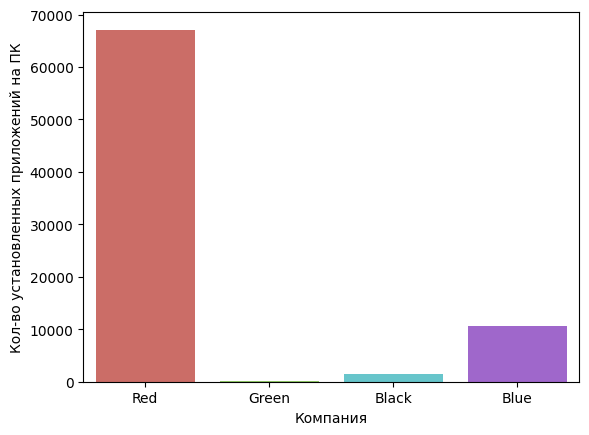

In [109]:
ax = sns.barplot(x=['Red', 'Green', 'Black', 'Blue'], y=[len(data[data['Red_web']==1]), len(data[data['Green_web']==1]), len(data[data['Black_web']==1]), len(data[data['Blue_web']==1])],palette='hls');
ax.set(xlabel='Компания', ylabel='Кол-во установленных приложений на ПК')

Аналогичным образом определим количество установленных приложений на Android и Apple:

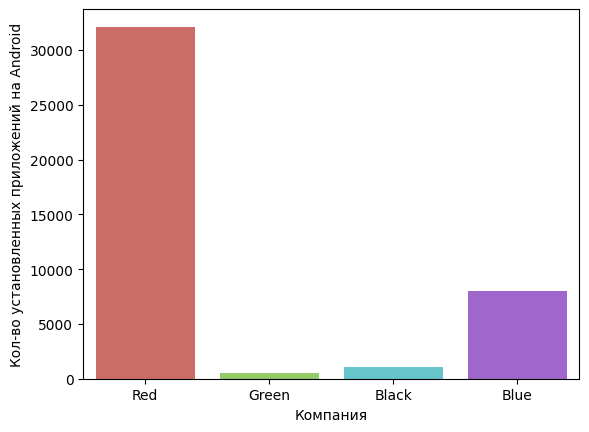

In [110]:
ax = sns.barplot(x=['Red', 'Green', 'Black', 'Blue'], y=[len(data[data['Red_android']==1]), len(data[data['Green_android']==1]), len(data[data['Black_android']==1]), len(data[data['Blue_android']==1])],palette='hls');
ax.set(xlabel='Компания', ylabel='Кол-во установленных приложений на Android');

[Text(0.5, 0, 'Компания'),
 Text(0, 0.5, 'Кол-во установленных приложений на Apple')]

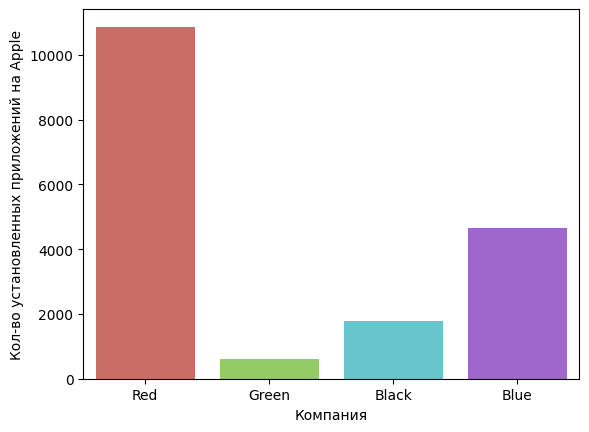

In [111]:
ax = sns.barplot(x=['Red', 'Green', 'Black', 'Blue'], y=[len(data[data['Red_apple']==1]), len(data[data['Green_apple']==1]), len(data[data['Black_apple']==1]), len(data[data['Blue_apple']==1])],palette='hls');
ax.set(xlabel='Компания', ylabel='Кол-во установленных приложений на Apple')

Наибольшее число установленных приложений у пользователей компании RED, в независимости от платформы. Далее идут компании BLUE, BLACK и GREEN соответственно. Пропорции всех компаний примерно одинаковые от платформы к платформе.

Рассчитаем процент установленных приложений на различные платформы у компании RED: 

In [112]:
data_Red = pd.DataFrame( {'name': ['Red_web','Red_android','Red_apple'],
                       'percent' : [round((data['Red_web'].sum()/(data['Red_web'].sum()+data['Red_android'].sum()+data['Red_apple'].sum())*100), 2),
                                   round((data['Red_android'].sum()/(data['Red_web'].sum()+data['Red_android'].sum()+data['Red_apple'].sum())*100), 2),
                                   round((data['Red_apple'].sum()/(data['Red_web'].sum()+data['Red_android'].sum()+data['Red_apple'].sum())*100), 2)]}
                     )

<AxesSubplot: ylabel='percent'>

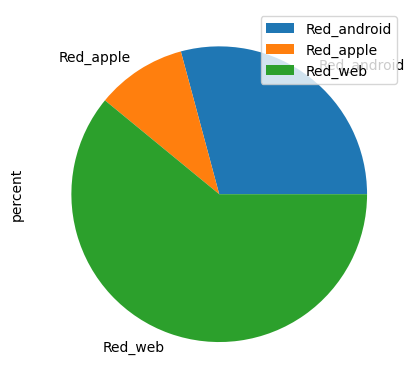

In [113]:
data_Red.groupby(['name']).sum().plot(kind='pie', y='percent')

Аналогично рассчитаем для компании Green:

In [114]:
data_Green = pd.DataFrame( {'name': ['Green_web','Green_android','Green_apple'],
                       'percent' : [round((data['Green_web'].sum()/(data['Green_web'].sum()+data['Green_android'].sum()+data['Green_apple'].sum())*100), 2),
                                   round((data['Green_android'].sum()/(data['Green_web'].sum()+data['Green_android'].sum()+data['Green_apple'].sum())*100), 2),
                                   round((data['Green_apple'].sum()/(data['Green_web'].sum()+data['Green_android'].sum()+data['Green_apple'].sum())*100), 2)]}
                     )

<AxesSubplot: ylabel='percent'>

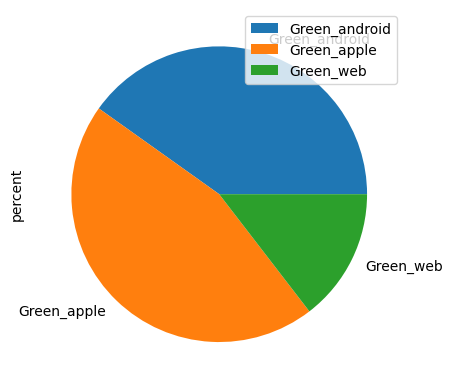

In [115]:
data_Green.groupby(['name']).sum().plot(kind='pie', y='percent')

Аналогично рассчитаем для компании Black:

In [116]:
data_Black = pd.DataFrame( {'name': ['Black_web','Black_android','Black_apple'],
                       'percent' : [round((data['Black_web'].sum()/(data['Black_web'].sum()+data['Black_android'].sum()+data['Black_apple'].sum())*100), 2),
                                   round((data['Black_android'].sum()/(data['Black_web'].sum()+data['Black_android'].sum()+data['Black_apple'].sum())*100), 2),
                                   round((data['Black_apple'].sum()/(data['Black_web'].sum()+data['Black_android'].sum()+data['Black_apple'].sum())*100), 2)]}
                     )

<AxesSubplot: ylabel='percent'>

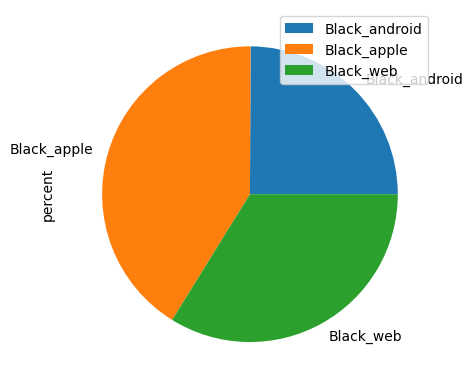

In [117]:
data_Black.groupby(['name']).sum().plot(kind='pie', y='percent')

Аналогично рассчитаем для компании Blue:

In [118]:
data_Blue = pd.DataFrame( {'name': ['Blue_web','Blue_android','Blue_apple'],
                       'percent' : [round((data['Blue_web'].sum()/(data['Blue_web'].sum()+data['Blue_android'].sum()+data['Blue_apple'].sum())*100), 2),
                                   round((data['Blue_android'].sum()/(data['Blue_web'].sum()+data['Blue_android'].sum()+data['Blue_apple'].sum())*100), 2),
                                   round((data['Blue_apple'].sum()/(data['Blue_web'].sum()+data['Blue_android'].sum()+data['Blue_apple'].sum())*100), 2)]}
                     )

<AxesSubplot: ylabel='percent'>

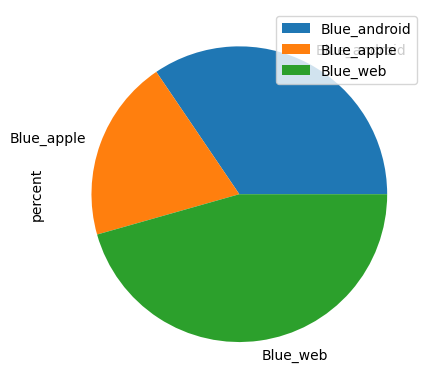

In [119]:
data_Blue.groupby(['name']).sum().plot(kind='pie', y='percent')

Как видно, у компании RED большую долю занимают устройства на ПК. У компании GREEN устройства на ПК наоборот занимают малую часть, а устройства на Apple и Android примерно равны.
У компании BLACK примерно равные показатели. У компании BLUE устройства на ПК и Android занимают занимают примерно поравну, и чуть меньшим у устройств на Apple. 

Посмотрим также, какой процент по суммарному gmv занимают пользователя в компаниях:

In [120]:
data_3 = pd.DataFrame( {'name': ['Blue_gmv_total ','Green_gvm_total ','Black_gvm_total '],
                       'percent' : [round((data['Blue_gmv_total'].sum()/(data['Blue_gmv_total'].sum()+data['Green_gvm_total'].sum()+data['Black_gvm_total'].sum())*100), 2),
                                   round((data['Green_gvm_total'].sum()/(data['Blue_gmv_total'].sum()+data['Green_gvm_total'].sum()+data['Black_gvm_total'].sum())*100), 2),
                                   round((data['Black_gvm_total'].sum()/(data['Blue_gmv_total'].sum()+data['Green_gvm_total'].sum()+data['Black_gvm_total'].sum())*100), 2)]}
                     )

<AxesSubplot: ylabel='percent'>

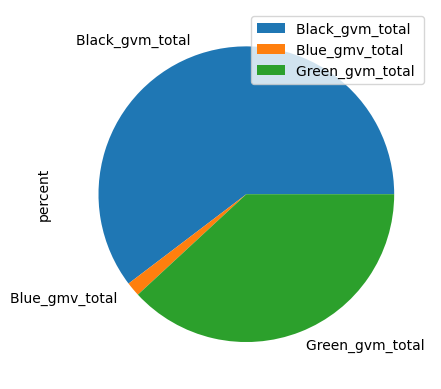

In [121]:
data_3.groupby(['name']).sum().plot(kind='pie', y='percent')

Больше всего по суммарному gmv занимают пользователи компании Black, далее с небольшим отстованием идут пользователи компании Green, и совсем мало по суммарному gmv пользователей компании Blue. По компании Red нет данных. 